In [31]:
import bayes3d as b
import genjax
import jax.numpy as jnp
import jax
import os

console = genjax.pretty(show_locals=False)

In [ ]:
# intrinsics = b.Intrinsics(
#     height=100,
#     width=100,
#     fx=50.0, fy=50.0,
#     cx=50.0, cy=50.0,
#     near=0.001, far=6.0
# )

# b.setup_renderer(intrinsics)
# b.RENDERER.add_mesh_from_file(os.path.join(b.utils.get_assets_dir(),"sample_objs/cube.obj"))


In [50]:
from dataclasses import dataclass
from math import pi

import jax
import jax.numpy as jnp

from genjax._src.generative_functions.distributions.distribution import ExactDensity


@dataclass
class GaussianVMFPose(ExactDensity):
    def sample(self, key, pose_mean, var, concentration, **kwargs):
        return b.distributions.gaussian_vmf_sample(key, pose_mean, var, concentration)

    def logpdf(self, pose, pose_mean, var, concentration, **kwargs):
        return b.distributions.gaussian_vmf_logpdf(pose, pose_mean, var, concentration)

gaussian_vmf_pose = GaussianVMFPose()

In [51]:
sample_jit = jax.jit(b.distributions.gaussian_vmf_sample)
sample_jit(key, center_pose, 0.00001, 800.0)
logpdf_jit = jax.jit(b.distributions.gaussian_vmf_logpdf)
logpdf_jit(center_pose, center_pose, 0.00001, 800.0)

Array(39.05253, dtype=float32)

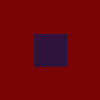

In [52]:
center_pose = b.t3d.transform_from_pos(jnp.array([0.0, 0.0, 2.0]))
img = b.RENDERER.render_single_object(center_pose, 0)
b.get_depth_image(img[:,:,2])

In [53]:
@genjax.gen
def scene(center_pose):
    pose = genjax.trace("pose", gaussian_vmf_pose)(center_pose, 0.0001, 0.001)
    return pose

simulate_jit = jax.jit(scene.simulate)


In [54]:
key = jax.random.PRNGKey(0)
trace= simulate_jit(key, (center_pose,))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_4287/2739044888.py:2 in <module>                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_4287/2739044888.py'                         │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/traceback_util │
│ .py:166 in reraise_with_filtered_traceback                                                       │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/pjit.py:238 in │
│ cache_miss                                                                                       │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/pjit.py:180 in │
│ _python_pjit_helper                                                                              │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/api.py:311 in  │
│ infer_params                                                                                     │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/pjit.py:480 in │
│ common_infer_params                                                                              │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/pjit.py:918 in │
│ _pjit_jaxpr                                                                                      │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/linear_util.py │
│ :322 in memoized_fun                                                                             │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/pjit.py:874 in │
│ _create_pjit_jaxpr                                                                               │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/profiler.py:31 │
│ 4 in wrapper                                                                                     │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/interpreters/p │
│ artial_eval.py:2049 in trace_to_jaxpr_dynamic                                                    │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/interpreters/p │
│ artial_eval.py:2066 in trace_to_subjaxpr_dynamic                                                 │
│                                                                                                  │
│ /home/nishadgothoskar/anaconda3/envs/bayes3d/lib/python3.8/site-packages/jax/_src/linear_util.py │
│ :166 in call_wrapped                                       

In [41]:
trace

(Array([4146024105,  967050713], dtype=uint32), BuiltinTrace(...))